In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import kagglehub

In [6]:

# Replace this path with the correct path to your CSV file
df = pd.read_excel(r"D:\OneDrive\Desktop\commerce.xlsx")


In [10]:
df.head()
df.shape

(1000, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [12]:
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


In [13]:
#EDA

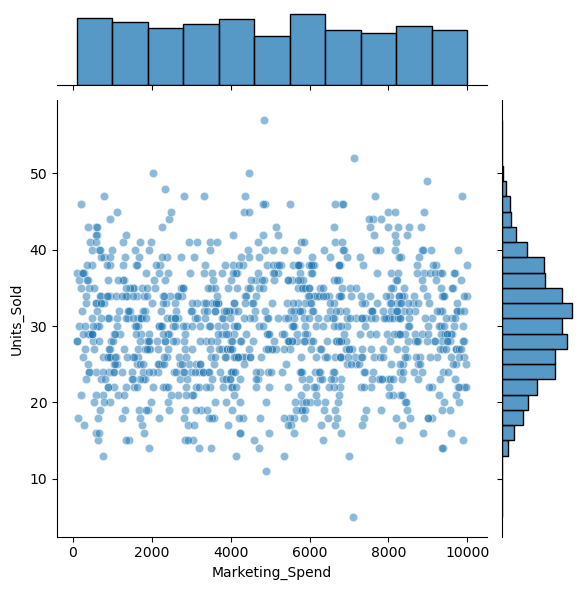

In [15]:
sns.jointplot(x="Marketing_Spend", y = "Units_Sold", data = df,alpha = 0.5)

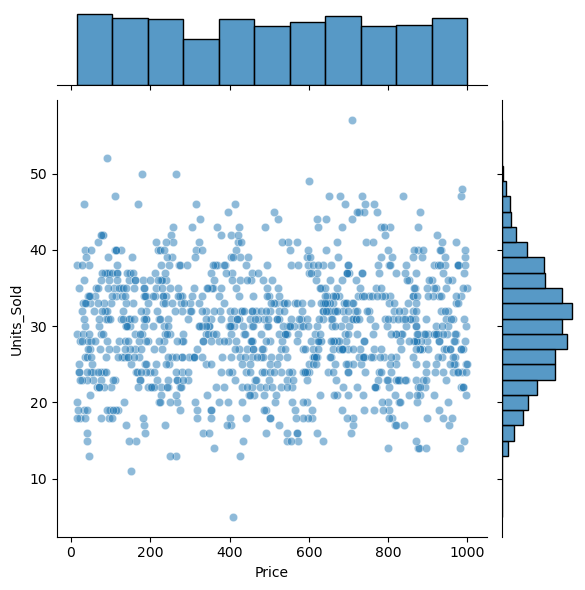

In [17]:
sns.jointplot(x="Price", y = "Units_Sold", data = df, alpha = 0.5)

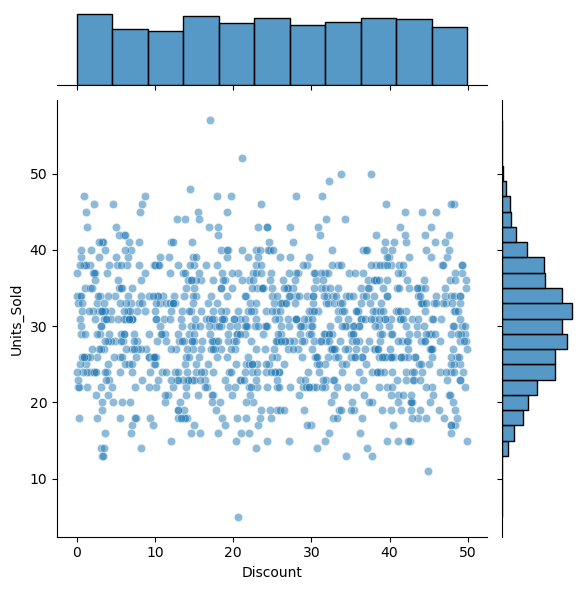

In [18]:
sns.jointplot(x="Discount", y = "Units_Sold", data = df,alpha = 0.5)

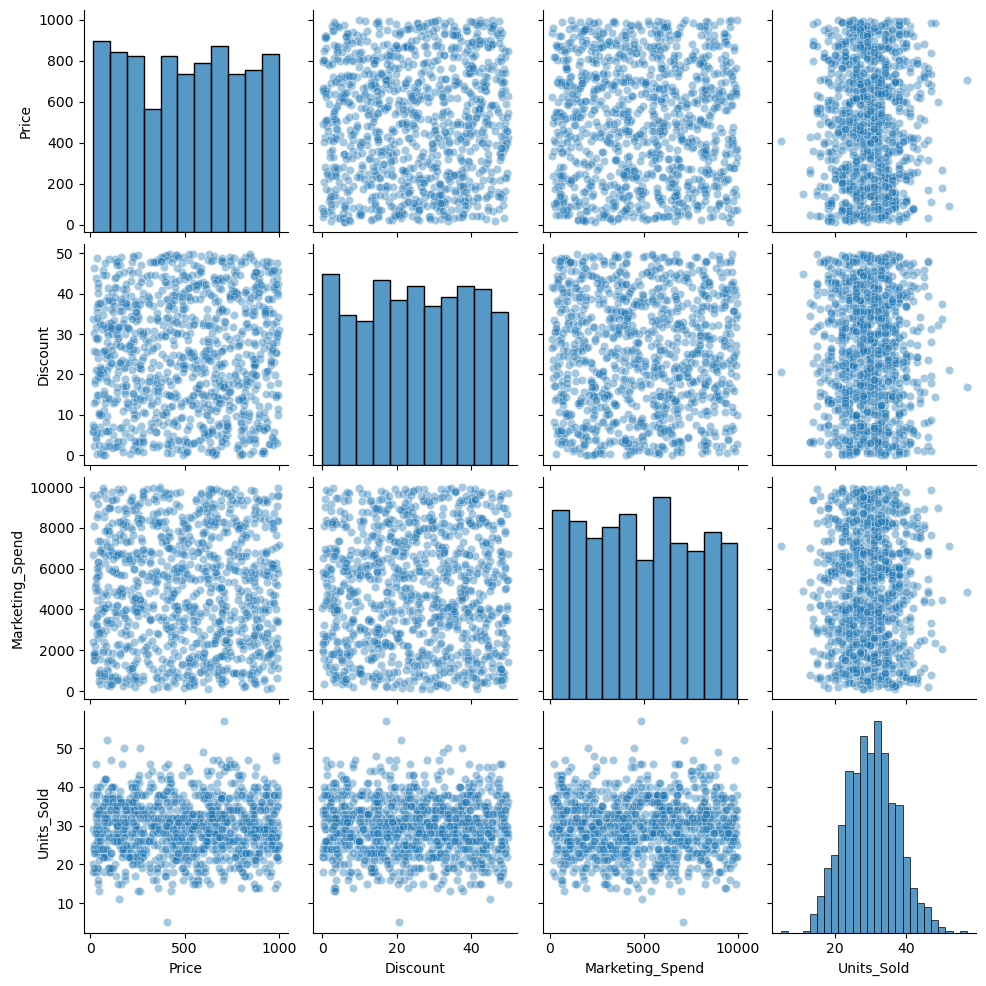

In [21]:
sns.pairplot(df, kind ='scatter', plot_kws = {'alpha': 0.4})

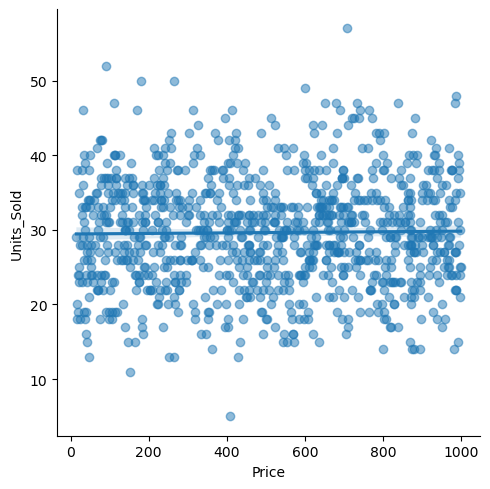

In [26]:
sns.lmplot(x="Price", y = "Units_Sold", data = df,scatter_kws={'alpha':0.5})

In [27]:
from sklearn.model_selection import train_test_split

In [42]:
X = df[['Discount', 'Marketing_Spend','Price']]
Y = df['Units_Sold']

In [43]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.2, random_state =42)

In [44]:
X_train

,Discount,Marketing_Spend,Price
29,26.52,1621.54,920.66
535,2.98,1044.07,722.01
695,10.16,1124.00,379.52
557,43.68,6829.00,728.01
836,0.22,5812.12,668.26
...,...,...,...
106,38.05,4929.56,189.62
270,10.07,8362.26,246.39
860,41.11,9414.71,558.26
435,2.41,9172.56,237.66


In [45]:
X_test

,Discount,Marketing_Spend,Price
521,19.73,2824.87,734.27
737,0.72,6964.88,279.90
740,37.02,8741.31,189.34
660,22.20,5052.76,692.63
411,42.92,3797.23,451.44
...,...,...,...
408,37.00,8353.08,493.76
332,44.10,8282.86,378.96
208,13.60,9115.00,808.50
613,22.70,8669.07,869.59


In [46]:
Y_train

29     25
535    29
695    31
557    35
836    23
       ..
106    31
270    25
860    20
435    37
102    28
Name: Units_Sold, Length: 800, dtype: int64

In [47]:
Y_test

521    47
737    26
740    25
660    33
411    31
       ..
408    34
332    24
208    18
613    32
78     40
Name: Units_Sold, Length: 200, dtype: int64

In [48]:
##Training the model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_train, Y_train)

LinearRegression()

In [53]:
lm.coef_ #y= b0 +B1X

array([-1.82428373e-02,  1.85154963e-05,  1.56308554e-05])

In [56]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['Coef'])
print(cdf)


                     Coef
Discount        -0.018243
Marketing_Spend  0.000019
Price            0.000016


In [57]:
#Predictions

In [58]:
predictions = lm.predict(X_test)

In [59]:
predictions

array([29.84110817, 30.25745666, 29.62671762, 29.83664799, 29.43163963,
       29.6579941 , 29.50072525, 29.83907568, 29.82455462, 29.78291159,
       29.97575648, 29.82705131, 29.3603645 , 29.58328601, 29.28939874,
       29.81070349, 30.1048456 , 29.74936704, 29.97212907, 30.10962596,
       29.64084118, 30.17571634, 30.17969671, 29.86971174, 29.83158283,
       29.80308346, 30.08809786, 29.39483499, 29.62376665, 30.04214803,
       29.52088374, 29.58360865, 30.21450863, 30.13977682, 29.64012097,
       29.64269083, 30.12553541, 29.57283206, 29.93286534, 29.97363243,
       29.41635301, 29.51121743, 29.95015476, 30.14893583, 29.58301134,
       29.36870474, 29.41040611, 30.27085516, 29.7418034 , 30.06257549,
       30.08223995, 29.93321748, 29.89932311, 29.59529666, 29.94965157,
       30.21127645, 30.23849148, 29.57906759, 29.46013087, 30.0010716 ,
       30.03815002, 29.9935618 , 30.03941656, 29.55023788, 29.83414494,
       29.76062978, 29.71322335, 29.9640376 , 30.18825278, 29.84

Text(0.5, 1.0, 'Evaluation of our LM')

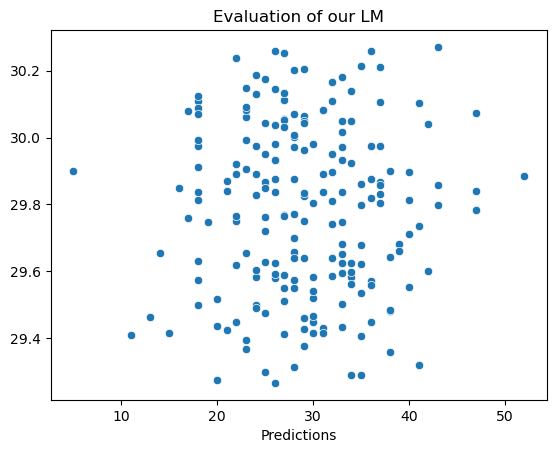

In [66]:
sns.scatterplot(x=Y_test, y=predictions)
plt.xlabel("Predictions")
plt.title("Evaluation of our LM")

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
import math

In [71]:
print("Mean Absolute Error", mean_absolute_error(Y_test, predictions))
print("Mean Squared Error", mean_squared_error(Y_test, predictions))
print("RMSE",math.sqrt(mean_absolute_error(Y_test, predictions)))
#Our model predicts unit sold fairly accurately, with typical errors around 2.43, 
#which is only 4.2% of the max price — a solid result. Some predictions are off by more 
#(average error ~10.2%), so there’s still room to fine-tune your model, especially to reduce the few larger errors.


Mean Absolute Error 5.915759685756672
Mean Squared Error 54.630263322939534
RMSE 2.432233476818513


In [72]:
#Residuals

In [73]:
residuals = Y_test-predictions

In [74]:
residuals

521    17.158892
737    -4.257457
740    -4.626718
660     3.163352
411     1.568360
         ...    
408     4.375347
332    -5.492034
208   -12.070562
613     2.102750
78     10.448153
Name: Units_Sold, Length: 200, dtype: float64

In [75]:
#Test Normality

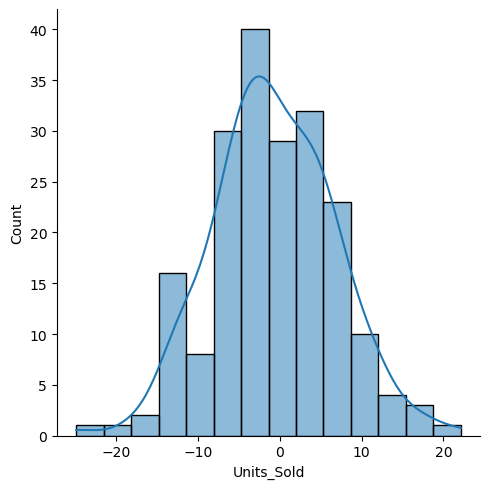

In [77]:
sns.displot(residuals,kde=True)

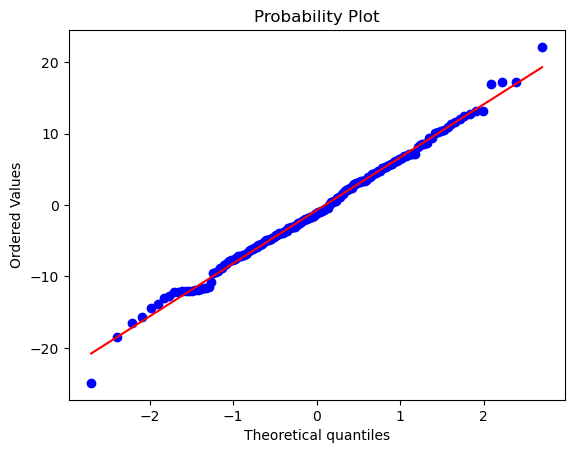

In [78]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.show()

In [ ]:
###END####